In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display full columns
pd.set_option('display.max_columns', None)

# Load the dataset
df = pd.read_csv("/content/Netflix Dataset.csv")

# Display basic info
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (7789, 11)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [9]:
# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Convert date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract year from release date
df['Year'] = df['Release_Date'].dt.year

# Clean text data (strip whitespace)
df['Country'] = df['Country'].astype(str).str.strip()
df['Type'] = df['Type'].astype(str).str.strip()

# Handle missing data for key columns
df['Country'] = df['Country'].fillna('Unknown')
df['Type'] = df['Type'].fillna('Unknown')
df['Director'] = df['Director'].fillna('Not Specified')

# Verify after cleaning
print("\nAfter Cleaning:")
print(df.info())


Missing Values:
 Show_Id           0
Category          0
Title             0
Director          0
Cast            718
Country           0
Release_Date     98
Rating            7
Duration          0
Type              0
Description       0
Year             98
dtype: int64

After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7787 non-null   object        
 1   Category      7787 non-null   object        
 2   Title         7787 non-null   object        
 3   Director      7787 non-null   object        
 4   Cast          7069 non-null   object        
 5   Country       7787 non-null   object        
 6   Release_Date  7689 non-null   datetime64[ns]
 7   Rating        7780 non-null   object        
 8   Duration      7787 non-null   object        
 9   Type          7787 non-null   object        
 10  Descr

In [10]:
print("Number of Movies:", len(df[df['Category'] == 'Movie']))
print("Number of TV Shows:", len(df[df['Category'] == 'TV Show']))
print("\nUnique Genres:", df['Type'].nunique())
print("Unique Countries:", df['Country'].nunique())


Number of Movies: 5377
Number of TV Shows: 2410

Unique Genres: 492
Unique Countries: 682


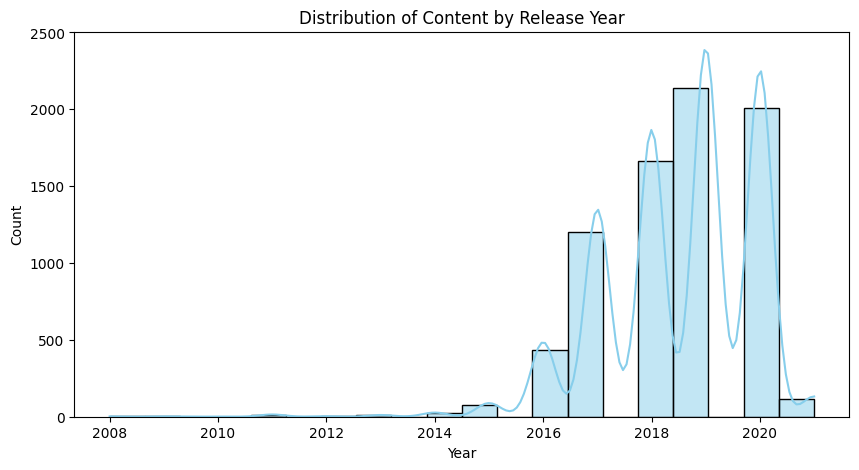

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['Year'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Distribution of Content by Release Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


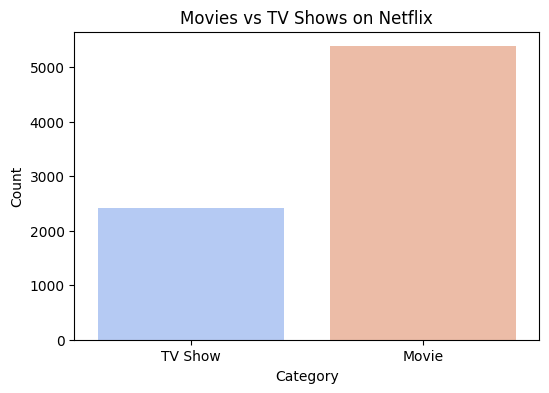

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category', palette='coolwarm', hue='Category', legend=False)
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

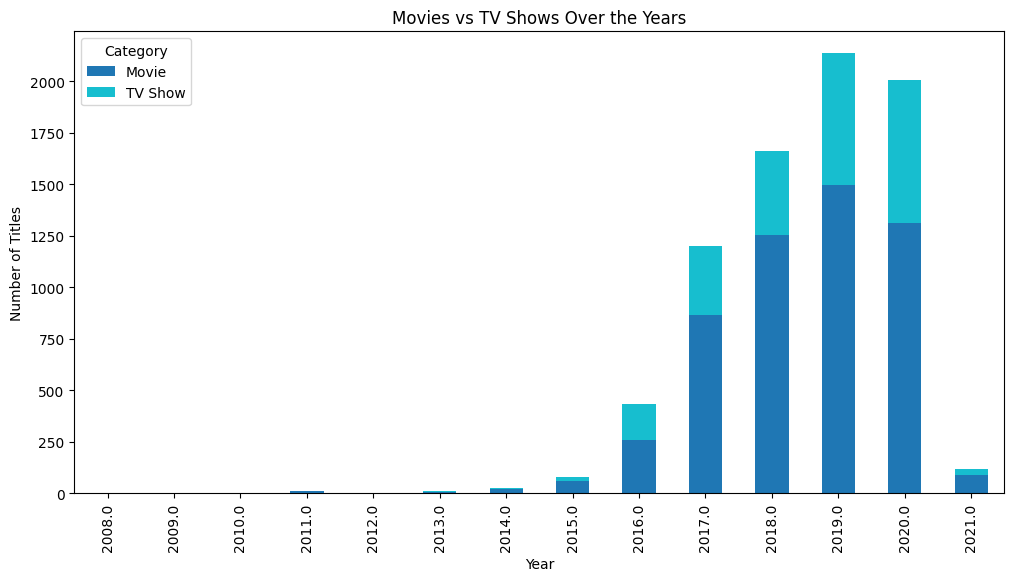

In [14]:
content_trend = df.groupby(['Year', 'Category']).size().unstack(fill_value=0)
content_trend.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab10')
plt.title("Movies vs TV Shows Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Category")
plt.show()

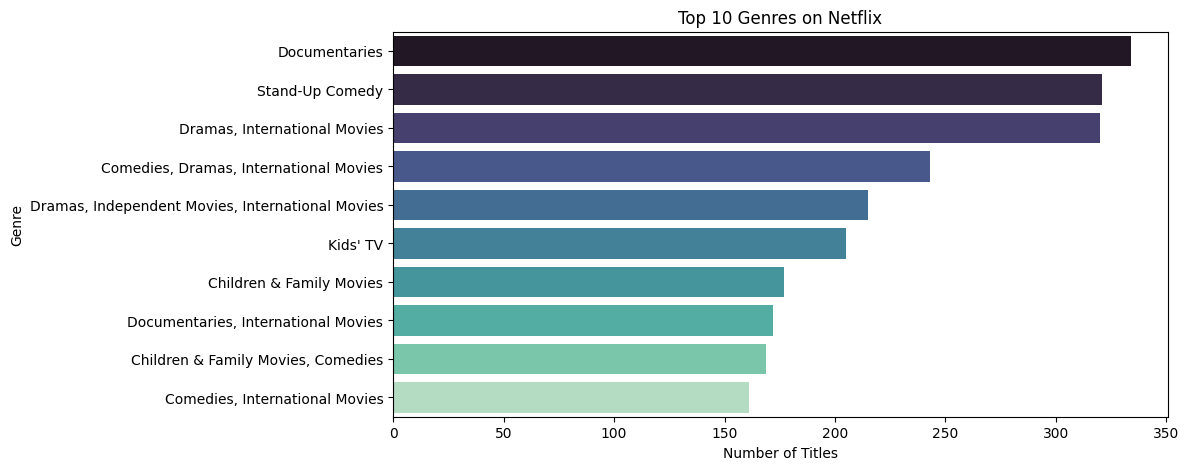

In [16]:
plt.figure(figsize=(10,5))
top_genres = df['Type'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='mako', hue=top_genres.index, legend=False)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

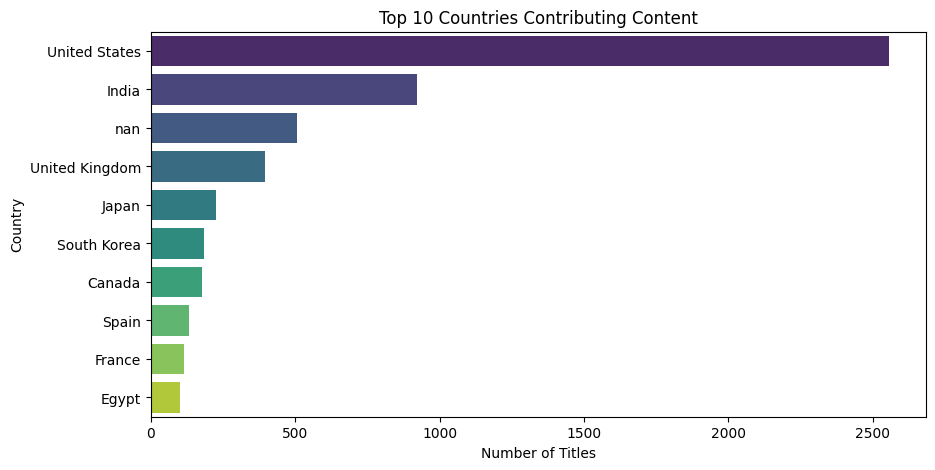

In [18]:
plt.figure(figsize=(10,5))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis', hue=top_countries.index, legend=False)
plt.title("Top 10 Countries Contributing Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

In [20]:
recent_movies = df[(df['Category'] == 'Movie') & (df['Year'] > 2015)]
recent_movies.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020.0


In [21]:
india_shows = df[(df['Category'] == 'TV Show') & (df['Country'].str.contains("India", case=False))]
india_shows[['Title', 'Type', 'Country', 'Year']].head()

,Title,Type,Country,Year
86,21 Sarfarosh: Saragarhi 1897,"International TV Shows, TV Dramas",India,2018.0
132,7 (Seven),TV Shows,India,2019.0
340,Agent Raghav,"Crime TV Shows, International TV Shows, TV Act...",India,2017.0
364,Akbar Birbal,"Kids' TV, TV Comedies, TV Dramas",India,2020.0
533,Anjaan: Rural Myths,"International TV Shows, TV Horror, TV Thrillers",India,2018.0


In [22]:
drama_content = df[df['Type'].str.contains("Drama", case=False, na=False)]
drama_content[['Title', 'Category', 'Type', 'Year']].head()

,Title,Category,Type,Year
0,3%,TV Show,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020.0
1,07:19,Movie,"Dramas, International Movies",2016.0
4,21,Movie,Dramas,2020.0
5,46,TV Show,"International TV Shows, TV Dramas, TV Mysteries",2017.0
7,187,Movie,Dramas,2019.0


In [23]:
print("📈 Summary Insights")
print("-----------------------------")
print(f"Total Movies: {len(df[df['Category']=='Movie'])}")
print(f"Total TV Shows: {len(df[df['Category']=='TV Show'])}")
print(f"Most Common Genre: {df['Type'].value_counts().idxmax()}")
print(f"Top Contributing Country: {df['Country'].value_counts().idxmax()}")

📈 Summary Insights
-----------------------------
Total Movies: 5377
Total TV Shows: 2410
Most Common Genre: Documentaries
Top Contributing Country: United States
